# MLOps. Практическое задание №5

#### Цель задания:

Применить средства автоматизации тестирования python для автоматического тестирования качества работы модели машинного обучения на различных датасетах.

In [1]:
!pip install ipytest

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.5 MB/s eta 0:00:00


In [2]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

import pytest
import ipytest

ipytest.autoconfig()

### Утилиты

In [3]:
def create_dataset(count = 100, coefs = (4, 8), noise = False):
  """
  Создает датасет.
  Параметры:
  count - кол-во данных
  coefs - наклон и плотность данных
  noise - нужно ли добавлять шум
  """

  [coef_1, coef_2] = coefs

  X = 2 * np.random.rand(count, 1)
  y = coef_1 + coef_2 * X + np.random.randn(count, 1)

  if noise:
    y[25:60] *= 2

  plt.scatter(X, y)
  plt.xlabel('X')
  plt.ylabel('y')
  plt.show()

  return [X, y]

# ML

### Данные

Создадим 4 датасета, один из которых будет базовым (используем его для обучения модели), 2 похожых на базовый, и один с усиленным шумом:

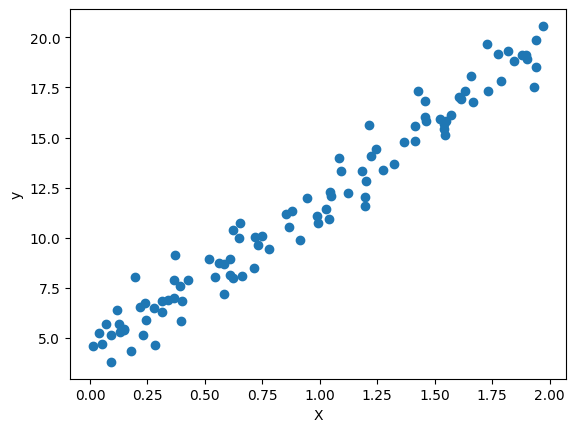

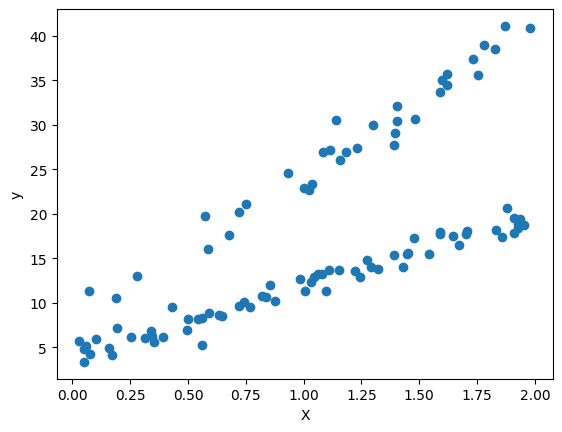

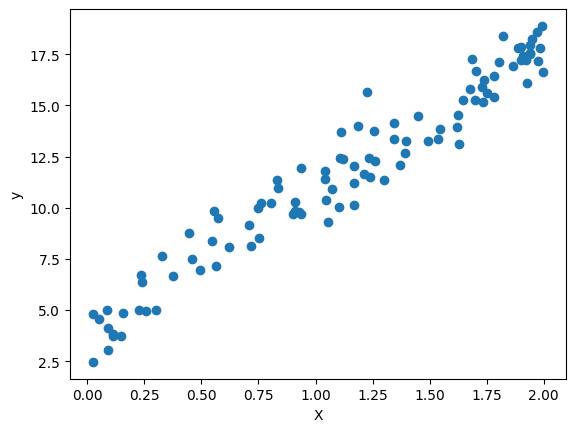

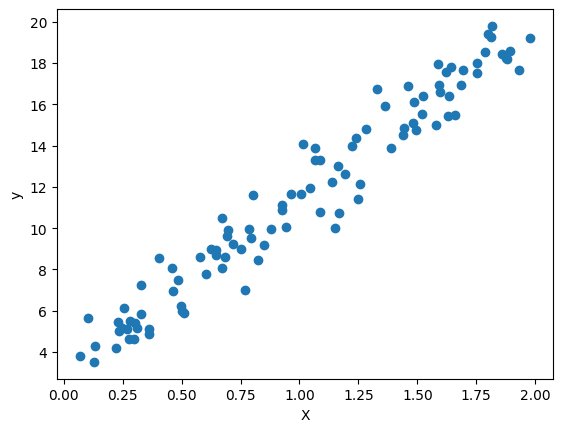

In [4]:
np.random.seed(42)

# датасет для обучения
[X_base, y_base] = create_dataset()
# данные с шумом
[X_data_with_noise, y_data_with_noise] = create_dataset(noise=True)
# данные с меньшей плотностью
[X_density_data, y_density_data] = create_dataset(coefs=(4, 7))
# данные с большим наклоном
[X_incline_data, y_incline_data] = create_dataset(coefs=(3.5, 8))

### Обучаем модель

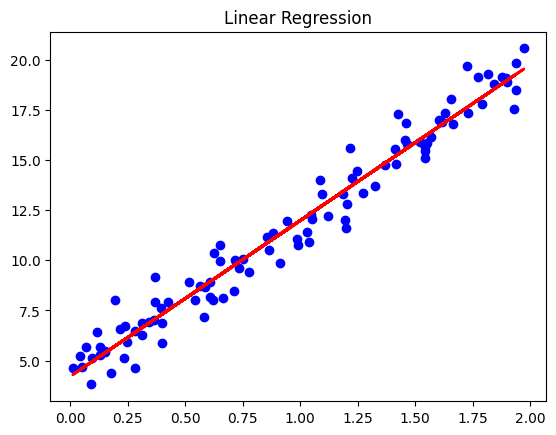

In [5]:
model = LinearRegression()

model.fit(X_base, y_base)

# Получаем предсказанные значения
y_pred = model.predict(X_base)

# Визуализация результата
plt.scatter(X_base, y_base, color='blue')
plt.plot(X_base, y_pred, color='red', linewidth=2)
plt.title('Linear Regression')
plt.show()

Видно что наша модель научилась хорошо предсказывать по нашим данным. Зафиксируем некоторые показатели по которым далее будем проводить тестирование нашей модели:

In [6]:
# среднеквадратичная ошибка
mse = np.mean((y_pred - y_base)**2)
mse

0.8065845639670535

In [7]:
# средняя абсолютная ошибка
mae = np.mean(np.abs(y_pred - y_base))
mae

0.7010426719637758

### Тестовые данные

Теперь у нас есть все что нужно, данные, модель, пора приступить к тестированию. Так как нужно протестировать именно работу модели на различных данных, будем использовать метрики **MSE** и **MAE**, так как они показывают на сколько хорошо наша модель делает предсказанию по отношению к целевой переменной. Будем проверять обе, так как например, если в данных присутствуют выбросы, может быть предпочтительнее использовать MAE вместо MSE.


---


**Средняяквадратичная ошибка (Mean Square Error, MSE):** среднее квадратичное значение разностей между предсказанными и истинными значениями.

**Средняя абсолютная ошибка (Mean Absolute Error, MAE):** среднее абсолютное значение разностей между предсказанными и истинными значениями. MAE менее чувствительна к выбросам по сравнению с MSE.

Подготовим датасеты:

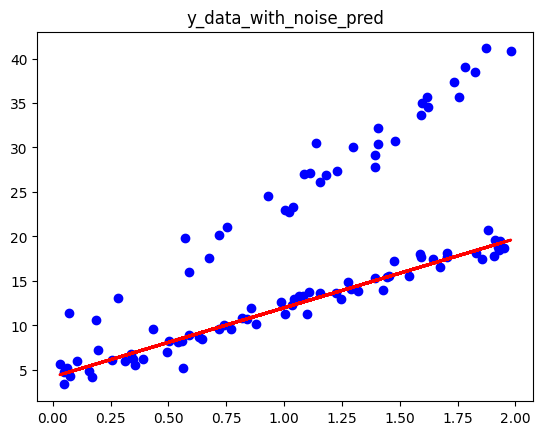

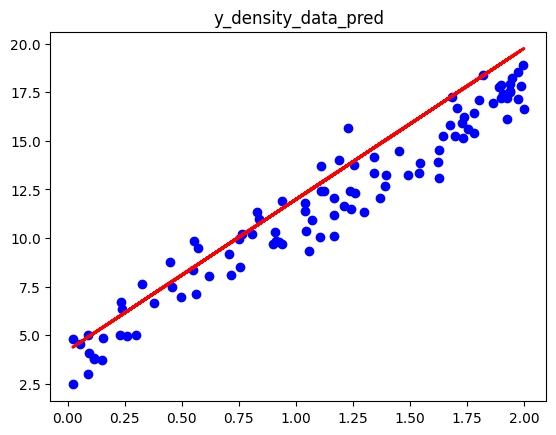

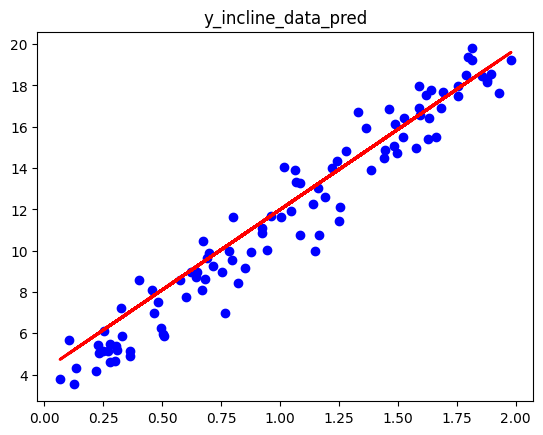

In [8]:
# Получаем предсказанные значения
y_data_with_noise_pred = model.predict(X_data_with_noise)
y_density_data_pred = model.predict(X_density_data)
y_incline_data_pred = model.predict(X_incline_data)

def show_regression(x, y, y_pred, name):
  plt.scatter(x, y, color='blue')
  plt.plot(x, y_pred, color='red', linewidth=2)
  plt.title(name)
  plt.show()


show_regression(X_data_with_noise, y_data_with_noise, y_data_with_noise_pred, 'y_data_with_noise_pred')
show_regression(X_density_data, y_density_data, y_density_data_pred, 'y_density_data_pred')
show_regression(X_incline_data, y_incline_data, y_incline_data_pred, 'y_incline_data_pred')

## Тестирование

Прогоним тесты на базовом датасете:

In [9]:
%%ipytest

def test_base_test1():
  """
  Тестируем качество предсказания, смотрим на среднеквадратичную ошибку

  Предпологаем что мы не хотим что среднеквадратичная ошибка выходила за пределы
  от базовой модели больше чем на 0.05
  """
  curr_mse = np.mean((y_pred - y_base)**2)
  assert curr_mse < (mse + 0.05), "Среднеквадратичная ошибка выше ожидаемой"
  assert curr_mse > (mse - 0.05), "Среднеквадратичная ошибка ниже ожидаемой"

  """
  Тестируем качество предсказания, смотрим на среднюю абсолютную ошибку

  Предпологаем что мы не хотим что средняя абсолютная ошибка выходила за пределы
  от базовой модели больше чем на 0.05
  """
  curr_mae = np.mean(np.abs(y_pred - y_base))
  assert curr_mae < (mae + 0.05), "Средняя абсолютная ошибка выше ожидаемой"
  assert curr_mae > (mae - 0.05), "Средняя абсолютная ошибка ниже ожидаемой"


ipytest.run('-v', '-rA')

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.5.0
rootdir: /content
plugins: anyio-3.7.1
collected 1 item

t_6e130b0d498e48b38b034b09c084e8c9.py .                                                      [100%]

============================================== PASSES ==============================================
===================================== short test summary info ======================================
PASSED t_6e130b0d498e48b38b034b09c084e8c9.py::test_base_test1
======================================== 1 passed in 0.03s =========================================


<ExitCode.OK: 0>

.                                                                                            [100%]
1 passed in 0.01s


 + тесты успешно прошли

Попробуем на зашумленных датасетах:

In [13]:
%%ipytest

def test_density_data_test1():
  """
  Тестируем качество предсказания, смотрим на среднеквадратичную ошибку

  Предпологаем что мы не хотим что среднеквадратичная ошибка выходила за пределы
  от базовой модели больше чем на 0.05
  """
  curr_mse = np.mean((y_density_data_pred - y_base)**2)
  assert curr_mse < (mse + 0.05), "Среднеквадратичная ошибка выше ожидаемой"
  assert curr_mse > (mse - 0.05), "Среднеквадратичная ошибка ниже ожидаемой"

  """
  Тестируем качество предсказания, смотрим на среднюю абсолютную ошибку

  Предпологаем что мы не хотим что средняя абсолютная ошибка выходила за пределы
  от базовой модели больше чем на 0.05
  """
  curr_mae = np.mean(np.abs(y_density_data_pred - y_base))
  assert curr_mae < (mae + 0.05), "Средняя абсолютная ошибка выше ожидаемой"
  assert curr_mae > (mae - 0.05), "Средняя абсолютная ошибка ниже ожидаемой"


ipytest.run('-v', '-rA')

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.5.0
rootdir: /content
plugins: anyio-3.7.1
collected 1 item

t_6e130b0d498e48b38b034b09c084e8c9.py F                                                      [100%]

============================================= FAILURES =============================================
_____________________________________ test_density_data_test1 ______________________________________

    def test_density_data_test1():
      """
      Тестируем качество предсказания, смотрим на среднеквадратичную ошибку
    
      Предпологаем что мы не хотим что среднеквадратичная ошибка выходила за пределы
      от базовой модели больше чем на 0.05
      """
      curr_mse = np.mean((y_density_data_pred - y_base)**2)
>     assert curr_mse < (mse + 0.05), "Среднеквадратичная ошибка выше ожидаемой"
E     AssertionError: Среднеквадратичная ошибка выше ожидаемой
E     ass

<ExitCode.TESTS_FAILED: 1>

F                                                                                            [100%]
============================================= FAILURES =============================================
_____________________________________ test_density_data_test1 ______________________________________

    def test_density_data_test1():
      """
      Тестируем качество предсказания, смотрим на среднеквадратичную ошибку
    
      Предпологаем что мы не хотим что среднеквадратичная ошибка выходила за пределы
      от базовой модели больше чем на 0.05
      """
      curr_mse = np.mean((y_density_data_pred - y_base)**2)
>     assert curr_mse < (mse + 0.05), "Среднеквадратичная ошибка выше ожидаемой"
E     AssertionError: Среднеквадратичная ошибка выше ожидаемой
E     assert 41.03784994899141 < (0.8065845639670535 + 0.05)

<ipython-input-13-0ec924831423>:9: AssertionError
===================================== short test summary info ======================================
FAILED t_6e130b0

In [14]:
%%ipytest

def test_incline_data_test1():
  """
  Тестируем качество предсказания, смотрим на среднеквадратичную ошибку

  Предпологаем что мы не хотим что среднеквадратичная ошибка выходила за пределы
  от базовой модели больше чем на 0.05
  """
  curr_mae = np.mean(np.abs(y_incline_data_pred - y_base))
  assert curr_mae < (mae + 0.05), "Среднеквадратичная ошибка выше ожидаемой"
  assert curr_mae > (mae - 0.05), "Среднеквадратичная ошибка ниже ожидаемой"

  """
  Тестируем качество предсказания, смотрим на среднюю абсолютную ошибку

  Предпологаем что мы не хотим что средняя абсолютная ошибка выходила за пределы
  от базовой модели больше чем на 0.05
  """
  curr_mae = np.mean(np.abs(y_incline_data_pred - y_base))
  assert curr_mae < (mae + 0.05), "Средняя абсолютная ошибка выше ожидаемой"
  assert curr_mae > (mae - 0.05), "Средняя абсолютная ошибка ниже ожидаемой"


ipytest.run('-v', '-rA')

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.5.0
rootdir: /content
plugins: anyio-3.7.1
collected 1 item

t_6e130b0d498e48b38b034b09c084e8c9.py F                                                      [100%]

============================================= FAILURES =============================================
_____________________________________ test_incline_data_test1 ______________________________________

    def test_incline_data_test1():
      """
      Тестируем качество предсказания, смотрим на среднеквадратичную ошибку
    
      Предпологаем что мы не хотим что среднеквадратичная ошибка выходила за пределы
      от базовой модели больше чем на 0.05
      """
      curr_mae = np.mean(np.abs(y_incline_data_pred - y_base))
>     assert curr_mae < (mae + 0.05), "Среднеквадратичная ошибка выше ожидаемой"
E     AssertionError: Среднеквадратичная ошибка выше ожидаемой
E     

<ExitCode.TESTS_FAILED: 1>

F                                                                                            [100%]
============================================= FAILURES =============================================
_____________________________________ test_incline_data_test1 ______________________________________

    def test_incline_data_test1():
      """
      Тестируем качество предсказания, смотрим на среднеквадратичную ошибку
    
      Предпологаем что мы не хотим что среднеквадратичная ошибка выходила за пределы
      от базовой модели больше чем на 0.05
      """
      curr_mae = np.mean(np.abs(y_incline_data_pred - y_base))
>     assert curr_mae < (mae + 0.05), "Среднеквадратичная ошибка выше ожидаемой"
E     AssertionError: Среднеквадратичная ошибка выше ожидаемой
E     assert 5.013232604757453 < (0.7010426719637758 + 0.05)

<ipython-input-14-92ae4e3f82c2>:9: AssertionError
===================================== short test summary info ======================================
FAILED t_6e13

In [15]:
%%ipytest

def test_data_with_noise_test1():
  """
  Тестируем качество предсказания, смотрим на среднеквадратичную ошибку

  Предпологаем что мы не хотим что среднеквадратичная ошибка выходила за пределы
  от базовой модели больше чем на 0.05
  """
  curr_mae = np.mean(np.abs(y_data_with_noise_pred - y_base))
  assert curr_mae < (mae + 0.05), "Среднеквадратичная ошибка выше ожидаемой"
  assert curr_mae > (mae - 0.05), "Среднеквадратичная ошибка ниже ожидаемой"

  """
  Тестируем качество предсказания, смотрим на среднюю абсолютную ошибку

  Предпологаем что мы не хотим что средняя абсолютная ошибка выходила за пределы
  от базовой модели больше чем на 0.05
  """
  curr_mae = np.mean(np.abs(y_data_with_noise_pred - y_base))
  assert curr_mae < (mae + 0.05), "Средняя абсолютная ошибка выше ожидаемой"
  assert curr_mae > (mae - 0.05), "Средняя абсолютная ошибка ниже ожидаемой"


ipytest.run('-v', '-rA')

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.5.0
rootdir: /content
plugins: anyio-3.7.1
collected 1 item

t_6e130b0d498e48b38b034b09c084e8c9.py F                                                      [100%]

============================================= FAILURES =============================================
____________________________________ test_data_with_noise_test1 ____________________________________

    def test_data_with_noise_test1():
      """
      Тестируем качество предсказания, смотрим на среднеквадратичную ошибку
    
      Предпологаем что мы не хотим что среднеквадратичная ошибка выходила за пределы
      от базовой модели больше чем на 0.05
      """
      curr_mae = np.mean(np.abs(y_data_with_noise_pred - y_base))
>     assert curr_mae < (mae + 0.05), "Среднеквадратичная ошибка выше ожидаемой"
E     AssertionError: Среднеквадратичная ошибка выше ожидаемой


<ExitCode.TESTS_FAILED: 1>

F                                                                                            [100%]
============================================= FAILURES =============================================
____________________________________ test_data_with_noise_test1 ____________________________________

    def test_data_with_noise_test1():
      """
      Тестируем качество предсказания, смотрим на среднеквадратичную ошибку
    
      Предпологаем что мы не хотим что среднеквадратичная ошибка выходила за пределы
      от базовой модели больше чем на 0.05
      """
      curr_mae = np.mean(np.abs(y_data_with_noise_pred - y_base))
>     assert curr_mae < (mae + 0.05), "Среднеквадратичная ошибка выше ожидаемой"
E     AssertionError: Среднеквадратичная ошибка выше ожидаемой
E     assert 5.298076389028012 < (0.7010426719637758 + 0.05)

<ipython-input-15-b34bce4fce6d>:9: AssertionError
===================================== short test summary info ======================================
FAILED 

## Итог

В рамках этого задания мы преминили средства автоматизации тестирования python для автоматического тестирования качества работы модели машинного обучения на различных датасетах.